In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import pathlib
import itertools
import glob
import json
import seaborn as sns
from scipy.stats import gaussian_kde

In [2]:
import monalysa
from monalysa import movements
from monalysa import quality

In [3]:
# Define the font family and size
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams['font.weight'] = 'light'  # Use 'light' font weight

In [4]:
base_fig_dir = pathlib.Path.cwd().parent / "figures"

## Continuitiy of SPARC and LDLJ measures: Change in submovement amplitude

In [45]:
# Generate of a series of movements with two submovements and varying amplitude.
dt = 0.001
fs = 1/dt
t = np.arange(0, 3.0, dt)
v = movements.mjt_discrete_movement(amp=1, dur=1., loc=0.5, time=t, data_type='vel')

# Generate a series of movements of varying amplitude
u = [movements.mjt_discrete_movement(amp=_uamp, dur=1., loc=2.5, time=t, data_type='vel')
     for _uamp in np.arange(0.0, 1.0, 0.001)]

In [53]:
# Compute the LDLJ smoothness for the combined movements.
vel_th = 0.0001
ldlj_smooth = np.zeros(len(u))
for i, _u in enumerate(u):
    w = v + _u
    # Start and stop of the velocity profile
    strt_inx, stp_inx = np.where(w > 0.01)[0][[0, -1]]
    ldlj_smooth[i] = quality.smoothness.log_dimensionless_jerk(
        w[strt_inx:stp_inx],
        fs=fs,
        data_type="vel"
    )

(962, 1)
(962, 1)
(962, 1)
(962, 1)
(962, 1)
(962, 1)
(2600, 1)
(2659, 1)
(2695, 1)
(2720, 1)
(2740, 1)
(2756, 1)
(2769, 1)
(2780, 1)
(2790, 1)
(2798, 1)
(2806, 1)
(2812, 1)
(2818, 1)
(2823, 1)
(2828, 1)
(2833, 1)
(2837, 1)
(2841, 1)
(2844, 1)
(2847, 1)
(2850, 1)
(2853, 1)
(2856, 1)
(2858, 1)
(2861, 1)
(2863, 1)
(2865, 1)
(2867, 1)
(2869, 1)
(2871, 1)
(2873, 1)
(2874, 1)
(2876, 1)
(2877, 1)
(2879, 1)
(2880, 1)
(2882, 1)
(2883, 1)
(2884, 1)
(2885, 1)
(2887, 1)
(2888, 1)
(2889, 1)
(2890, 1)
(2891, 1)
(2892, 1)
(2893, 1)
(2894, 1)
(2895, 1)
(2895, 1)
(2896, 1)
(2897, 1)
(2898, 1)
(2899, 1)
(2899, 1)
(2900, 1)
(2901, 1)
(2902, 1)
(2902, 1)
(2903, 1)
(2904, 1)
(2904, 1)
(2905, 1)
(2905, 1)
(2906, 1)
(2907, 1)
(2907, 1)
(2908, 1)
(2908, 1)
(2909, 1)
(2909, 1)
(2910, 1)
(2910, 1)
(2911, 1)
(2911, 1)
(2912, 1)
(2912, 1)
(2913, 1)
(2913, 1)
(2913, 1)
(2914, 1)
(2914, 1)
(2915, 1)
(2915, 1)
(2915, 1)
(2916, 1)
(2916, 1)
(2917, 1)
(2917, 1)
(2917, 1)
(2918, 1)
(2918, 1)
(2918, 1)
(2919, 1)
(2919,

In [54]:
# Compute the SPARC smoothness for the combined movements.
sparc_smooth = np.zeros(len(u))
for i, _u in enumerate(u):
    w = v + _u
    # Start and stop of the velocity profile
    strt_inx, stp_inx = np.where(w > 0.01)[0][[0, -1]]
    sparc_smooth[i] = quality.smoothness.sparc(w[strt_inx:stp_inx], fs=fs)[0]

In [57]:
inx = [0, 100, 500, 999]
ws = [v + u[i] for i in inx]
ldlj_ws = [quality.smoothness.log_dimensionless_jerk(w, fs=fs, data_type="vel") for w in ws]
sparc_ws = [quality.smoothness.sparc(w, fs=fs)[0] for w in ws]

(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)


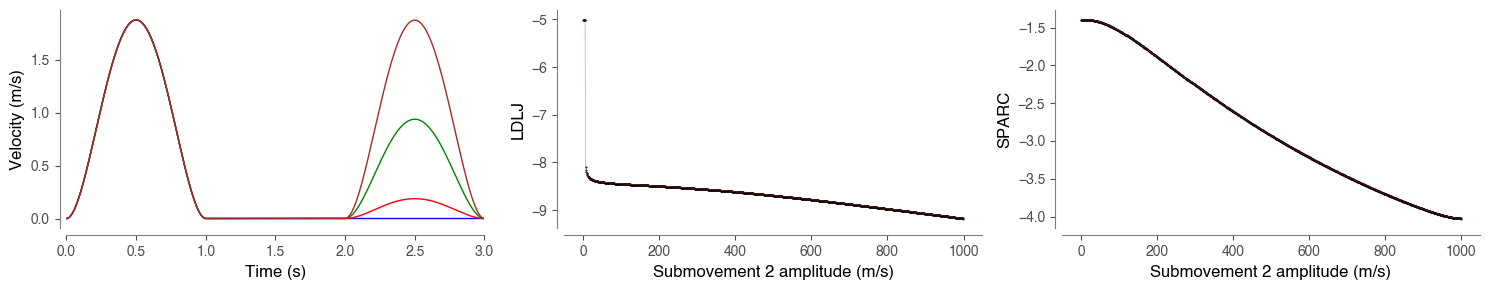

In [80]:
fig = plt.figure(figsize=(15, 3))
# Plot of different movements profiles.
ax = fig.add_subplot(131)
ax.plot(t, ws[0], lw=1, color="blue")
ax.plot(t, ws[1], lw=1, color="red")
ax.plot(t, ws[2], lw=1, color="green")
ax.plot(t, ws[3], lw=1, color="brown")
ax.set_xlim(0, 3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Time (s)", fontsize=12)
ax.set_ylabel("Velocity (m/s)", fontsize=12)
              
# LDLJ smoothness
ax = fig.add_subplot(132)
ax.plot(ldlj_smooth[::], '.', markersize=1, color="black")
ax.plot(ldlj_smooth, lw=0.5, color="tab:red", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Submovement 2 amplitude (m/s)", fontsize=12)
ax.set_ylabel("LDLJ", fontsize=12)

# SPARC smoothness
ax = fig.add_subplot(133)
ax.plot(sparc_smooth[::], '.', markersize=1, color="black")
ax.plot(sparc_smooth, lw=0.5, color="tab:red", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Submovement 2 amplitude (m/s)", fontsize=12)
ax.set_ylabel("SPARC", fontsize=12)
plt.tight_layout()

## Continuitiy of SPARC and LDLJ measures: Change in inter-submovement interval

In [89]:
# Generate of a series of movements with two submovements and varying amplitude.
dt = 0.001
fs = 1/dt
t = np.arange(0, 3.0, dt)
v = movements.mjt_discrete_movement(amp=1, dur=1., loc=0.5, time=t, data_type='vel')

# Generate a series of movements of varying amplitude
u = [movements.mjt_discrete_movement(amp=1., dur=1., loc=_uloc, time=t, data_type='vel')
     for _uloc in np.arange(0.5, 2.5, 0.001)]

In [90]:
# Compute the LDLJ smoothness for the combined movements.
vel_th = 0.0001
ldlj_smooth = np.zeros(len(u))
for i, _u in enumerate(u):
    w = v + _u
    # Start and stop of the velocity profile
    strt_inx, stp_inx = np.where(w > 0.01)[0][[0, -1]]
    ldlj_smooth[i] = quality.smoothness.log_dimensionless_jerk(
        w[strt_inx:stp_inx],
        fs=fs,
        data_type="vel"
    )

(972, 1)
(973, 1)
(972, 1)
(973, 1)
(974, 1)
(973, 1)
(974, 1)
(973, 1)
(974, 1)
(975, 1)
(974, 1)
(975, 1)
(976, 1)
(977, 1)
(976, 1)
(977, 1)
(978, 1)
(979, 1)
(980, 1)
(981, 1)
(982, 1)
(983, 1)
(984, 1)
(985, 1)
(986, 1)
(987, 1)
(988, 1)
(989, 1)
(990, 1)
(991, 1)
(992, 1)
(993, 1)
(994, 1)
(995, 1)
(996, 1)
(997, 1)
(998, 1)
(999, 1)
(1000, 1)
(1001, 1)
(1002, 1)
(1003, 1)
(1004, 1)
(1005, 1)
(1006, 1)
(1007, 1)
(1008, 1)
(1009, 1)
(1010, 1)
(1011, 1)
(1012, 1)
(1013, 1)
(1014, 1)
(1015, 1)
(1016, 1)
(1017, 1)
(1018, 1)
(1019, 1)
(1020, 1)
(1021, 1)
(1022, 1)
(1023, 1)
(1024, 1)
(1025, 1)
(1026, 1)
(1027, 1)
(1028, 1)
(1029, 1)
(1030, 1)
(1031, 1)
(1032, 1)
(1033, 1)
(1034, 1)
(1035, 1)
(1036, 1)
(1037, 1)
(1038, 1)
(1039, 1)
(1040, 1)
(1041, 1)
(1042, 1)
(1043, 1)
(1044, 1)
(1045, 1)
(1046, 1)
(1047, 1)
(1048, 1)
(1049, 1)
(1050, 1)
(1051, 1)
(1052, 1)
(1053, 1)
(1054, 1)
(1055, 1)
(1056, 1)
(1057, 1)
(1058, 1)
(1059, 1)
(1060, 1)
(1061, 1)
(1062, 1)
(1063, 1)
(1064, 1)
(1065, 1

In [91]:
# Compute the SPARC smoothness for the combined movements.
sparc_smooth = np.zeros(len(u))
for i, _u in enumerate(u):
    w = v + _u
    # Start and stop of the velocity profile
    strt_inx, stp_inx = np.where(w > 0.01)[0][[0, -1]]
    sparc_smooth[i] = quality.smoothness.sparc(w[strt_inx:stp_inx], fs=fs)[0]

In [92]:
inx = [0, 100, 500, 999]
ws = [v + u[i] for i in inx]
ldlj_ws = [quality.smoothness.log_dimensionless_jerk(w, fs=fs, data_type="vel") for w in ws]
sparc_ws = [quality.smoothness.sparc(w, fs=fs)[0] for w in ws]

(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)


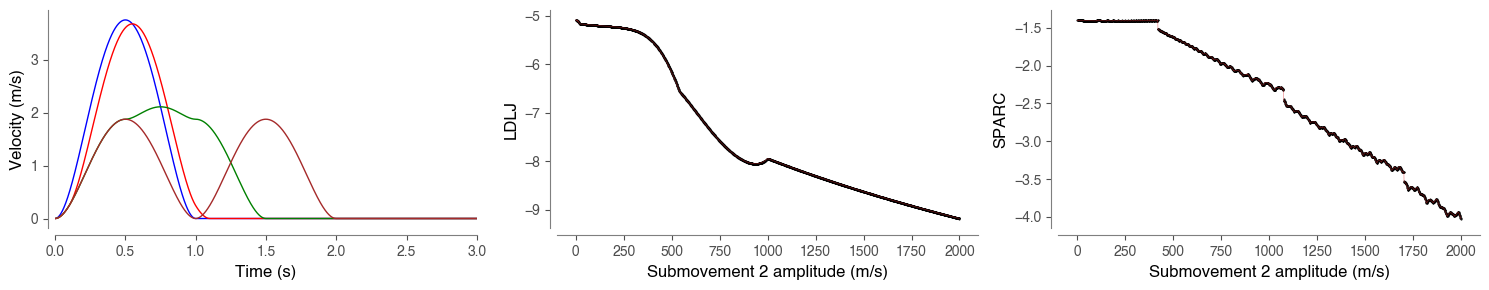

In [93]:
fig = plt.figure(figsize=(15, 3))
# Plot of different movements profiles.
ax = fig.add_subplot(131)
ax.plot(t, ws[0], lw=1, color="blue")
ax.plot(t, ws[1], lw=1, color="red")
ax.plot(t, ws[2], lw=1, color="green")
ax.plot(t, ws[3], lw=1, color="brown")
ax.set_xlim(0, 3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Time (s)", fontsize=12)
ax.set_ylabel("Velocity (m/s)", fontsize=12)
              
# LDLJ smoothness
ax = fig.add_subplot(132)
ax.plot(ldlj_smooth[::], '.', markersize=1, color="black")
ax.plot(ldlj_smooth, lw=0.5, color="tab:red", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Submovement 2 amplitude (m/s)", fontsize=12)
ax.set_ylabel("LDLJ", fontsize=12)

# SPARC smoothness
ax = fig.add_subplot(133)
ax.plot(sparc_smooth[::], '.', markersize=1, color="black")
ax.plot(sparc_smooth, lw=0.5, color="tab:red", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Submovement 2 amplitude (m/s)", fontsize=12)
ax.set_ylabel("SPARC", fontsize=12)
plt.tight_layout()

## Continuitiy of SPARC and LDLJ measures: Change in inter-submovement interval

In [94]:
# Generate of a series of movements with two submovements and varying amplitude.
dt = 0.001
fs = 1/dt
t = np.arange(0, 3.0, dt)
v = movements.gaussian_discrete_movement(amp=1, dur=1., loc=0.5, time=t, data_type='vel')

# Generate a series of movements of varying amplitude
u = [movements.gaussian_discrete_movement(amp=1., dur=1., loc=_uloc, time=t, data_type='vel')
     for _uloc in np.arange(0.5, 2.5, 0.001)]

In [95]:
# Compute the LDLJ smoothness for the combined movements.
vel_th = 0.0001
ldlj_smooth = np.zeros(len(u))
for i, _u in enumerate(u):
    w = v + _u
    # Start and stop of the velocity profile
    strt_inx, stp_inx = np.where(w > 0.01)[0][[0, -1]]
    ldlj_smooth[i] = quality.smoothness.log_dimensionless_jerk(
        w[strt_inx:stp_inx],
        fs=fs,
        data_type="vel"
    )

(920, 1)
(919, 1)
(920, 1)
(919, 1)
(920, 1)
(919, 1)
(920, 1)
(919, 1)
(920, 1)
(921, 1)
(920, 1)
(921, 1)
(920, 1)
(921, 1)
(920, 1)
(921, 1)
(922, 1)
(921, 1)
(922, 1)
(921, 1)
(922, 1)
(923, 1)
(922, 1)
(923, 1)
(922, 1)
(923, 1)
(924, 1)
(923, 1)
(924, 1)
(925, 1)
(924, 1)
(925, 1)
(924, 1)
(925, 1)
(926, 1)
(925, 1)
(926, 1)
(927, 1)
(928, 1)
(927, 1)
(928, 1)
(929, 1)
(928, 1)
(929, 1)
(930, 1)
(929, 1)
(930, 1)
(931, 1)
(932, 1)
(931, 1)
(932, 1)
(933, 1)
(934, 1)
(933, 1)
(934, 1)
(935, 1)
(936, 1)
(935, 1)
(936, 1)
(937, 1)
(938, 1)
(939, 1)
(938, 1)
(939, 1)
(940, 1)
(941, 1)
(942, 1)
(941, 1)
(942, 1)
(943, 1)
(944, 1)
(945, 1)
(944, 1)
(945, 1)
(946, 1)
(947, 1)
(948, 1)
(949, 1)
(948, 1)
(949, 1)
(950, 1)
(951, 1)
(952, 1)
(953, 1)
(954, 1)
(953, 1)
(954, 1)
(955, 1)
(956, 1)
(957, 1)
(958, 1)
(959, 1)
(960, 1)
(959, 1)
(960, 1)
(961, 1)
(962, 1)
(963, 1)
(964, 1)
(965, 1)
(966, 1)
(967, 1)
(966, 1)
(967, 1)
(968, 1)
(969, 1)
(970, 1)
(971, 1)
(972, 1)
(973, 1)
(974, 1)
(

In [96]:
# Compute the SPARC smoothness for the combined movements.
sparc_smooth = np.zeros(len(u))
for i, _u in enumerate(u):
    w = v + _u
    # Start and stop of the velocity profile
    strt_inx, stp_inx = np.where(w > 0.01)[0][[0, -1]]
    sparc_smooth[i] = quality.smoothness.sparc(w[strt_inx:stp_inx], fs=fs)[0]

In [97]:
inx = [0, 100, 500, 999]
ws = [v + u[i] for i in inx]
ldlj_ws = [quality.smoothness.log_dimensionless_jerk(w, fs=fs, data_type="vel") for w in ws]
sparc_ws = [quality.smoothness.sparc(w, fs=fs)[0] for w in ws]

(3000, 1)
(3000, 1)
(3000, 1)
(3000, 1)


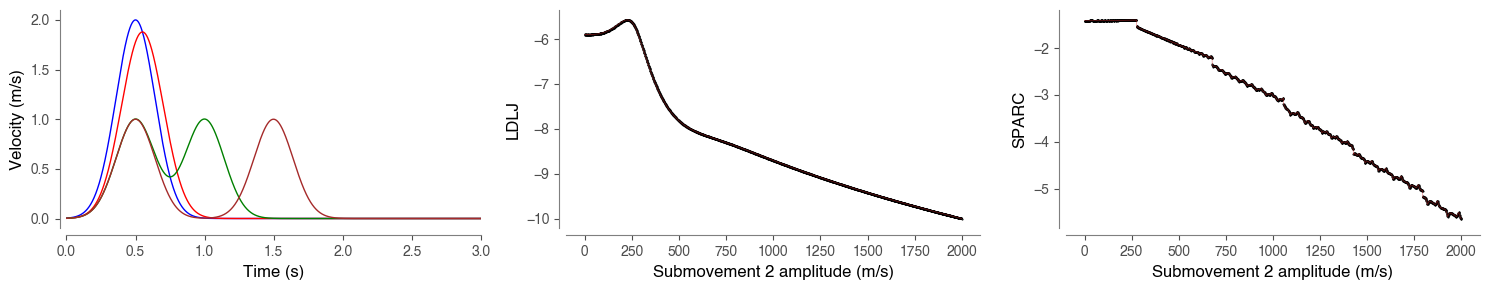

In [98]:
fig = plt.figure(figsize=(15, 3))
# Plot of different movements profiles.
ax = fig.add_subplot(131)
ax.plot(t, ws[0], lw=1, color="blue")
ax.plot(t, ws[1], lw=1, color="red")
ax.plot(t, ws[2], lw=1, color="green")
ax.plot(t, ws[3], lw=1, color="brown")
ax.set_xlim(0, 3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Time (s)", fontsize=12)
ax.set_ylabel("Velocity (m/s)", fontsize=12)
              
# LDLJ smoothness
ax = fig.add_subplot(132)
ax.plot(ldlj_smooth[::], '.', markersize=1, color="black")
ax.plot(ldlj_smooth, lw=0.5, color="tab:red", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Submovement 2 amplitude (m/s)", fontsize=12)
ax.set_ylabel("LDLJ", fontsize=12)

# SPARC smoothness
ax = fig.add_subplot(133)
ax.plot(sparc_smooth[::], '.', markersize=1, color="black")
ax.plot(sparc_smooth, lw=0.5, color="tab:red", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_color("tab:gray")
ax.spines['bottom'].set_color("tab:gray")
ax.tick_params(axis='x', colors='0.3')
ax.tick_params(axis='y', colors='0.3')
ax.set_xlabel("Submovement 2 amplitude (m/s)", fontsize=12)
ax.set_ylabel("SPARC", fontsize=12)
plt.tight_layout()